In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf


from sklearn.linear_model  import LinearRegression
from sklearn.svm import SVR


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer


from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_predict,RandomizedSearchCV,validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
#from skopt import BayesSearchCV

from hyperopt import hp, fmin, tpe, STATUS_OK, Trials,rand
from hyperopt.pyll.base import scope 

def mae(y_orig,y_pred):
    abs_error = abs(y_orig-y_pred)
    return (np.mean(abs_error) / np.mean(y_orig))*100
def rmse(y_true,y_pred):
    return (mse(y_true,y_pred))**0.5
from sklearn.model_selection import cross_validate

import warnings
warnings.simplefilter("ignore")


import xgboost as  xgb



In [2]:
df = pd.read_excel('DATA.xlsx',dtype=np.longfloat)

#Removing Missing Values
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
df = imputer.fit_transform(df)
X = df[:,:-1]
y = df[:,9]

#Splitiing the datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=22)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.10,random_state=22)

#Standardizing the data
scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train)
X_val_sca = scaler.transform(X_val)
X_test_sca = scaler.transform(X_test)

print("Size of Training = ",y_train.shape)
print("Size of Validation",y_val.shape)
print("Size of Testing",y_test.shape)

Size of Training =  (11241,)
Size of Validation (1250,)
Size of Testing (1388,)


# SVR

## INITIAL

In [3]:
model = SVR()
model.fit(X_train_sca,y_train)
print("Initial Model")

print("---------------------------------------------")
print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))


init_train_r2 = r2(y_train,model.predict(X_train_sca))
init_train_mse = mse(y_train,model.predict(X_train_sca))
init_train_rmse = rmse(y_train,model.predict(X_train_sca))
init_train_mae = mae(y_train,model.predict(X_train_sca))

init_val_r2 = r2(y_val,model.predict(X_val_sca))
init_val_mse = mse(y_val,model.predict(X_val_sca))
init_val_rmse = rmse(y_val,model.predict(X_val_sca))
init_val_mae = mae(y_val,model.predict(X_val_sca))

init_test_r2 = r2(y_test,model.predict(X_test_sca))
init_test_mse = mse(y_test,model.predict(X_test_sca))
init_test_rmse = rmse(y_test,model.predict(X_test_sca))
init_test_mae = mae(y_test,model.predict(X_test_sca))

Initial Model
---------------------------------------------
Training Score
R2 ->  0.6992780922570832
MSE ->  3.3579444496215967
RMSE ->  1.8324694948679492
MAE ->  13.971979476292862
---------------------------------------------
Validation Score
R2 ->  0.6635347315883449
MSE ->  3.8652540086867537
RMSE ->  1.9660249257541862
MAE ->  14.458396582256992
---------------------------------------------
Test Score
R2 ->  0.6941139800914305
MSE ->  3.1616770499039113
RMSE ->  1.7781105280335954
MAE ->  14.07416365241117


## FINAL

In [4]:
C = 584.6570888436889
epsilon=0.5906437756604672
gamma=0.27102404571990846


model = SVR(C=C,epsilon=epsilon,gamma=gamma)
model.fit(X_train_sca,y_train)

y_test_pred_SVR = model.predict(X_test_sca)


print("Final Model")

print("---------------------------------------------")
print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))

fin_train_r2 = r2(y_train,model.predict(X_train_sca))
fin_train_mse = mse(y_train,model.predict(X_train_sca))
fin_train_rmse = rmse(y_train,model.predict(X_train_sca))
fin_train_mae = mae(y_train,model.predict(X_train_sca))

fin_val_r2 = r2(y_val,model.predict(X_val_sca))
fin_val_mse = mse(y_val,model.predict(X_val_sca))
fin_val_rmse = rmse(y_val,model.predict(X_val_sca))
fin_val_mae = mae(y_val,model.predict(X_val_sca))

fin_test_r2 = r2(y_test,model.predict(X_test_sca))
fin_test_mse = mse(y_test,model.predict(X_test_sca))
fin_test_rmse = rmse(y_test,model.predict(X_test_sca))
fin_test_mae = mae(y_test,model.predict(X_test_sca))

svr_train_mse = mse(y_train,model.predict(X_train_sca))
svr_val_mse =mse(y_val,model.predict(X_val_sca))
svr_test_mse= mse(y_test,model.predict(X_test_sca))

Final Model
---------------------------------------------
Training Score
R2 ->  0.88438392495548
MSE ->  1.2910012456248272
RMSE ->  1.1362223574744634
MAE ->  9.095245538573433
---------------------------------------------
Validation Score
R2 ->  0.8346862318887611
MSE ->  1.8990955824341007
RMSE ->  1.378076769426907
MAE ->  11.506797712986653
---------------------------------------------
Test Score
R2 ->  0.8149571505602662
MSE ->  1.9126265740987567
RMSE ->  1.3829774307987663
MAE ->  11.321469404725573


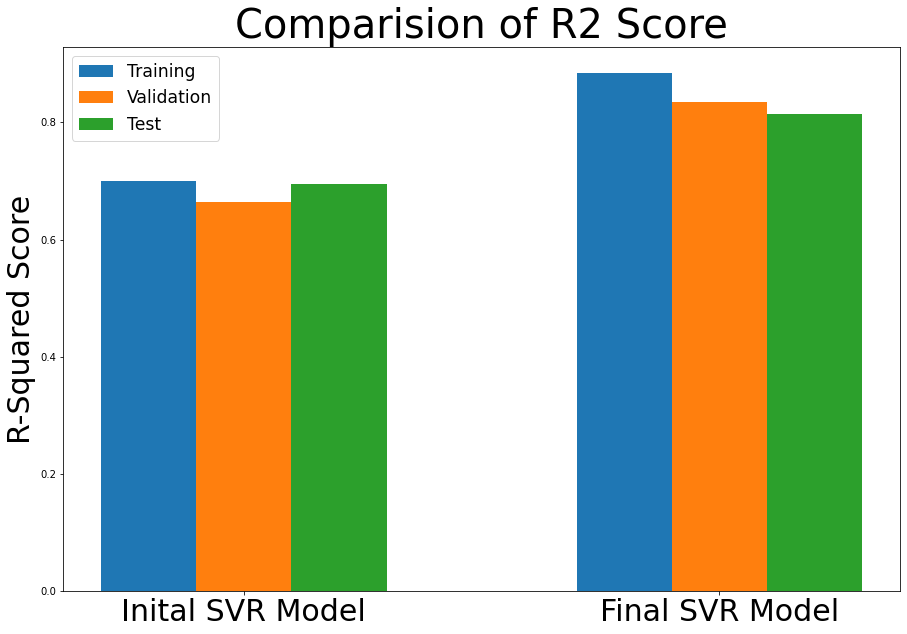

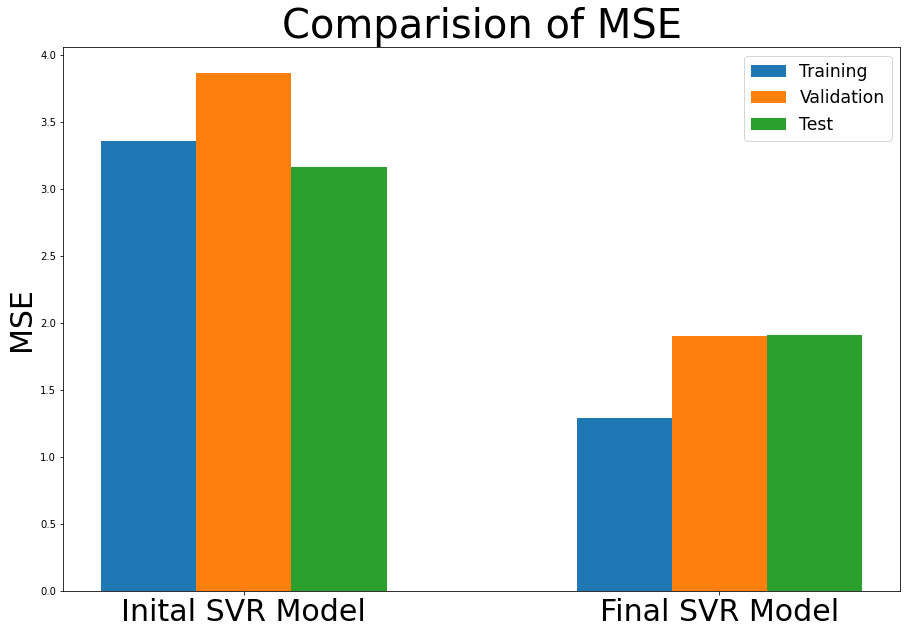

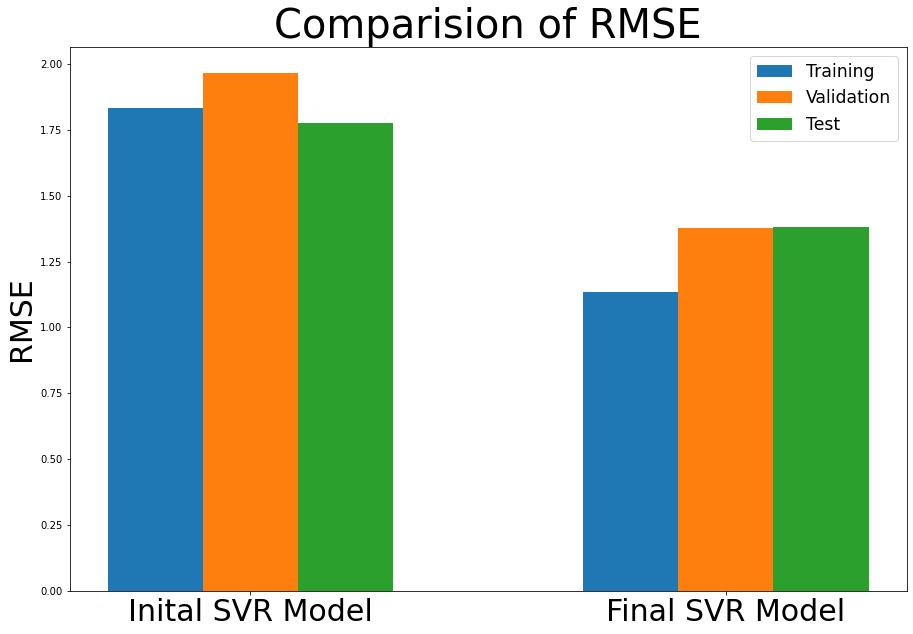

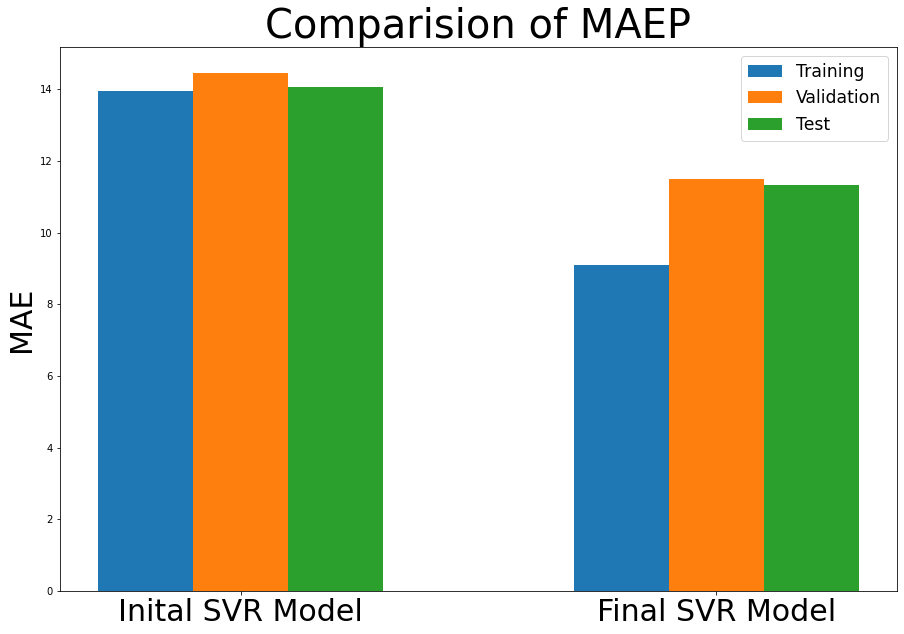

In [5]:
# R2
train_int = init_train_r2
val_int = init_val_r2
test_int= init_test_r2


train_fin = fin_train_r2
val_fin = fin_val_r2
test_fin = fin_test_r2


# Numbers of pairs of bars you want
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
train = (train_int,train_fin)
# Specify the values of orange bars (height)
val = (val_int,val_fin)

test = (test_int,test_fin)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(15,10))

# Width of a bar 
width = 0.2      

# Plotting
plt.bar(ind, train , width, label='Training')
plt.bar(ind + width, val, width, label='Validation')
plt.bar(ind + 2*width, test, width, label='Test')


plt.ylabel('R-Squared Score',size=30)
plt.title('Comparision of R2 Score',size=40)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width, ('Inital SVR Model', 'Final SVR Model'),size=30)

# Finding the best position for legends and putting it
plt.legend(loc='best',fontsize='xx-large')
plt.savefig('comp_r2_svr.jpg')
plt.show()


# MSE

train_int = init_train_mse
val_int = init_val_mse
test_int= init_test_mse


train_fin = fin_train_mse
val_fin = fin_val_mse
test_fin = fin_test_mse


# Numbers of pairs of bars you want
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
train = (train_int,train_fin)
# Specify the values of orange bars (height)
val = (val_int,val_fin)

test = (test_int,test_fin)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(15,10))

# Width of a bar 
width = 0.2      

# Plotting
plt.bar(ind, train , width, label='Training')
plt.bar(ind + width, val, width, label='Validation')
plt.bar(ind + 2*width, test, width, label='Test')


plt.ylabel('MSE',size=30)
plt.title('Comparision of MSE',size=40)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width, ('Inital SVR Model', 'Final SVR Model'),size=30)

# Finding the best position for legends and putting it
plt.legend(loc='best',fontsize='xx-large')
plt.savefig('comp_mse_SVR.jpg')
plt.show()


# RMSE

train_int = init_train_rmse
val_int = init_val_rmse
test_int= init_test_rmse


train_fin = fin_train_rmse
val_fin = fin_val_rmse
test_fin = fin_test_rmse


# Numbers of pairs of bars you want
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
train = (train_int,train_fin)
# Specify the values of orange bars (height)
val = (val_int,val_fin)

test = (test_int,test_fin)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(15,10))

# Width of a bar 
width = 0.2      

# Plotting
plt.bar(ind, train , width, label='Training')
plt.bar(ind + width, val, width, label='Validation')
plt.bar(ind + 2*width, test, width, label='Test')


plt.ylabel('RMSE',size=30)
plt.title('Comparision of RMSE',size=40)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width, ('Inital SVR Model', 'Final SVR Model'),size=30)

# Finding the best position for legends and putting it
plt.legend(loc='best',fontsize='xx-large')
plt.savefig('comp_rmse_svr.jpg')
plt.show()


# MAE

train_int = init_train_mae
val_int = init_val_mae
test_int= init_test_mae


train_fin = fin_train_mae
val_fin = fin_val_mae
test_fin = fin_test_mae


# Numbers of pairs of bars you want
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
train = (train_int,train_fin)
# Specify the values of orange bars (height)
val = (val_int,val_fin)

test = (test_int,test_fin)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(15,10))

# Width of a bar 
width = 0.2      

# Plotting
plt.bar(ind, train , width, label='Training')
plt.bar(ind + width, val, width, label='Validation')
plt.bar(ind + 2*width, test, width, label='Test')


plt.ylabel('MAE',size=30)
plt.title('Comparision of MAEP',size=40)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width, ('Inital SVR Model', 'Final SVR Model'),size=30)

# Finding the best position for legends and putting it
plt.legend(loc='best',fontsize='xx-large')
plt.savefig('comp_mae_SVR.jpg')
plt.show()


# ANN

In [6]:
df = pd.read_excel('adam_scores.xlsx')
x = df['hidden layers']
hid_layers = df['hidden layers']

test_r2 = df['test_r2']
test_mse = df['test_mse']
test_rmse = df['test_rmse']
test_maep = df['test_maep']

val_r2 = df['val_r2']
val_mse = df['val_mse']
val_rmse = df['val_rmse']
val_maep = df['val_maep']

train_r2 = df['train_r2']
train_mse = df['train_mse']
train_rmse = df['train_rmse']
train_maep = df['train_maep']

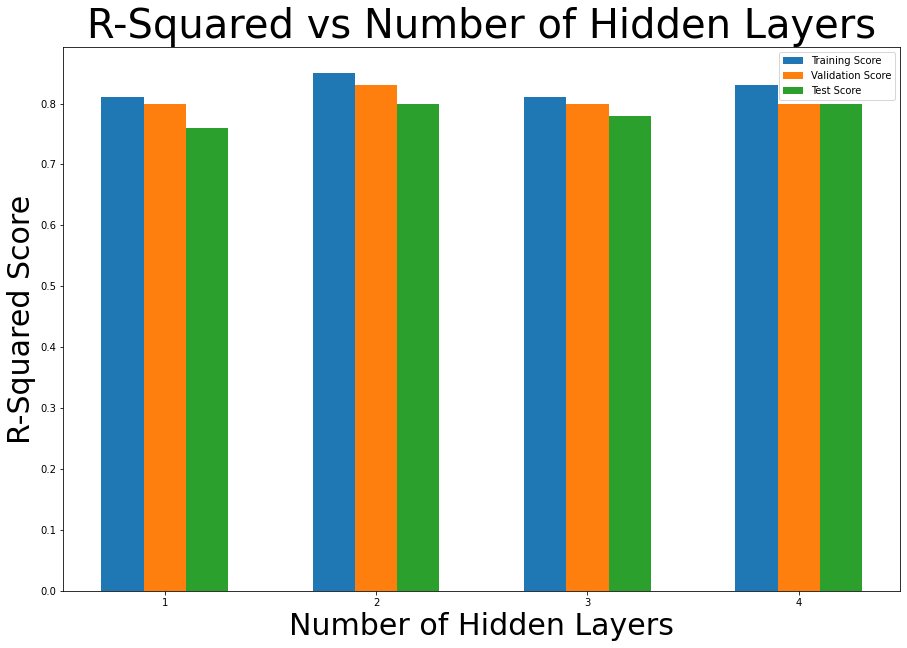

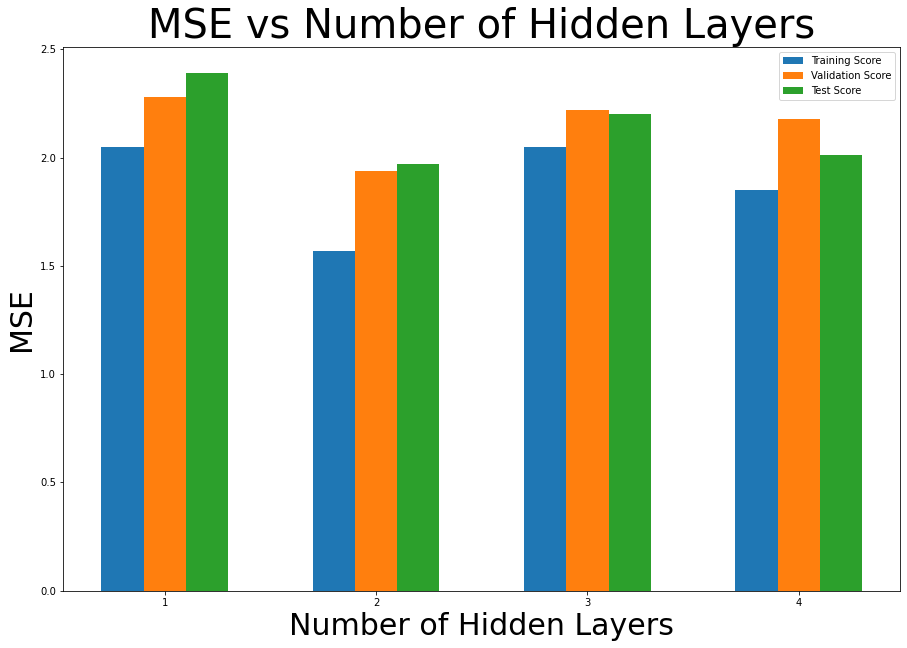

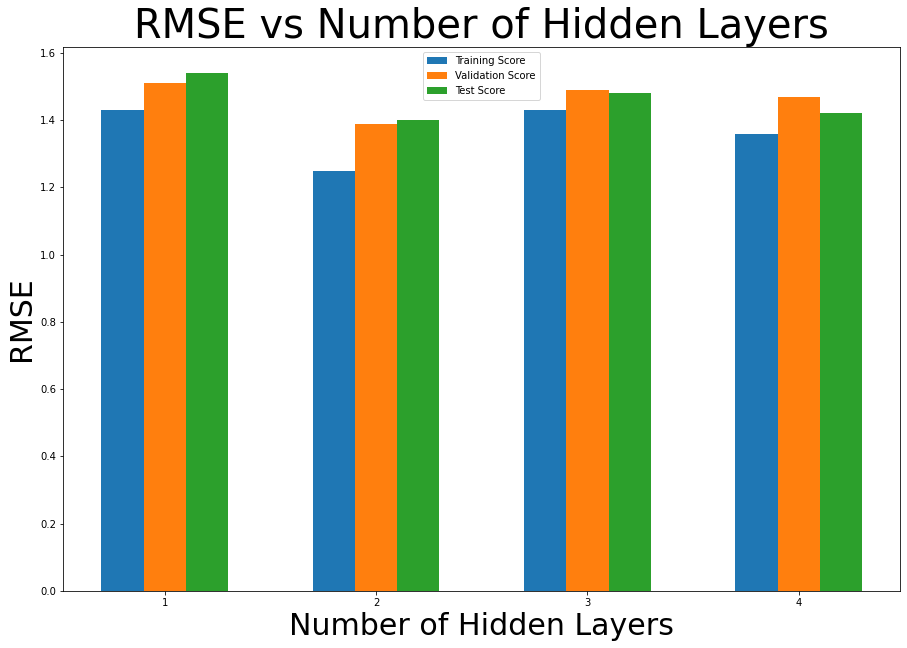

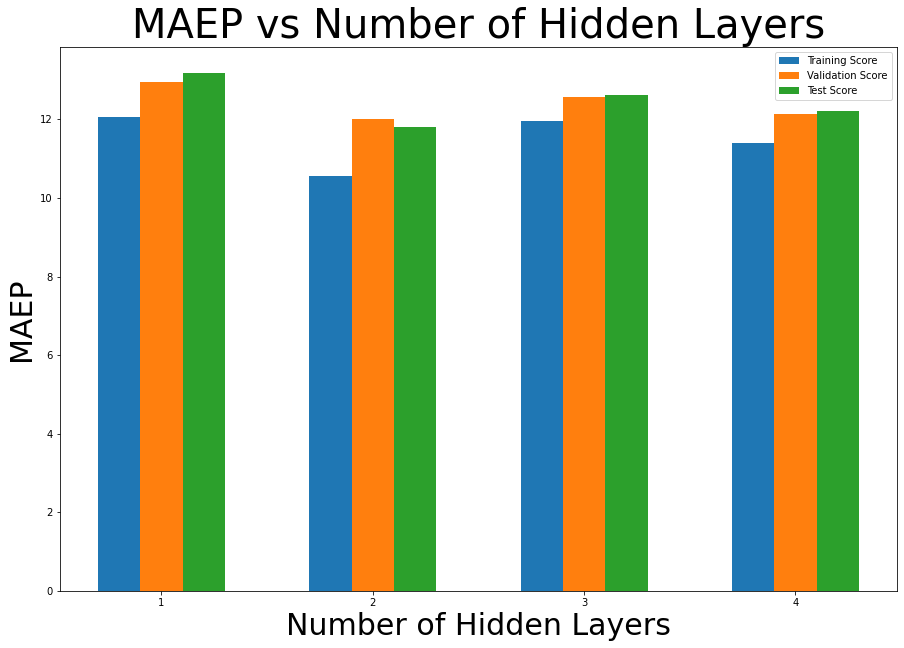

In [7]:

#R2
N = len(hid_layers)
train = train_r2
val = val_r2
test = test_r2
ind = hid_layers

plt.figure(figsize=(15,10))
width = 0.2       
plt.bar(ind, train , width, label='Training Score')
plt.bar(ind + width, val, width, label='Validation Score')
plt.bar(ind + 2*width, test, width, label='Test Score')
plt.xlabel('Number of Hidden Layers',size=30)
plt.ylabel('R-Squared Score',size=30)
plt.title('R-Squared vs Number of Hidden Layers',size=40)
plt.xticks(ind + width, hid_layers)
plt.legend(loc='best')
plt.savefig("r2_ann.jpg")
plt.show()

# MSE
N = len(hid_layers)
train = train_mse
val = val_mse
test = test_mse
ind = hid_layers

plt.figure(figsize=(15,10))
width = 0.2       
plt.bar(ind, train , width, label='Training Score')
plt.bar(ind + width, val, width, label='Validation Score')
plt.bar(ind + 2*width, test, width, label='Test Score')
plt.xlabel('Number of Hidden Layers',size=30)
plt.ylabel('MSE',size=30)
plt.title('MSE vs Number of Hidden Layers',size=40)
plt.xticks(ind + width, hid_layers)
plt.legend(loc='best')
plt.savefig("mse_ann.jpg")
plt.show()

#RMSE
N = len(hid_layers)
train = train_rmse
val = val_rmse
test = test_rmse
ind = hid_layers

plt.figure(figsize=(15,10))
width = 0.2      
plt.bar(ind, train , width, label='Training Score')
plt.bar(ind + width, val, width, label='Validation Score')
plt.bar(ind + 2*width, test, width, label='Test Score')
plt.xlabel('Number of Hidden Layers',size=30)
plt.ylabel('RMSE',size=30)
plt.title('RMSE vs Number of Hidden Layers',size=40)
plt.xticks(ind + width, hid_layers)
plt.legend(loc='best')
plt.savefig("rmse_ann.jpg")
plt.show()


#MAE

N = len(hid_layers)
train = train_maep
val = val_maep
test = test_maep
ind = hid_layers

plt.figure(figsize=(15,10))
width = 0.2       
plt.bar(ind, train , width, label='Training Score')
plt.bar(ind + width, val, width, label='Validation Score')
plt.bar(ind + 2*width, test, width, label='Test Score')
plt.xlabel('Number of Hidden Layers',size=30)
plt.ylabel('MAEP',size=30)
plt.title('MAEP vs Number of Hidden Layers',size=40)
plt.xticks(ind + width, hid_layers)
plt.legend(loc='best')
plt.savefig("maep_ann.jpg")
plt.show()

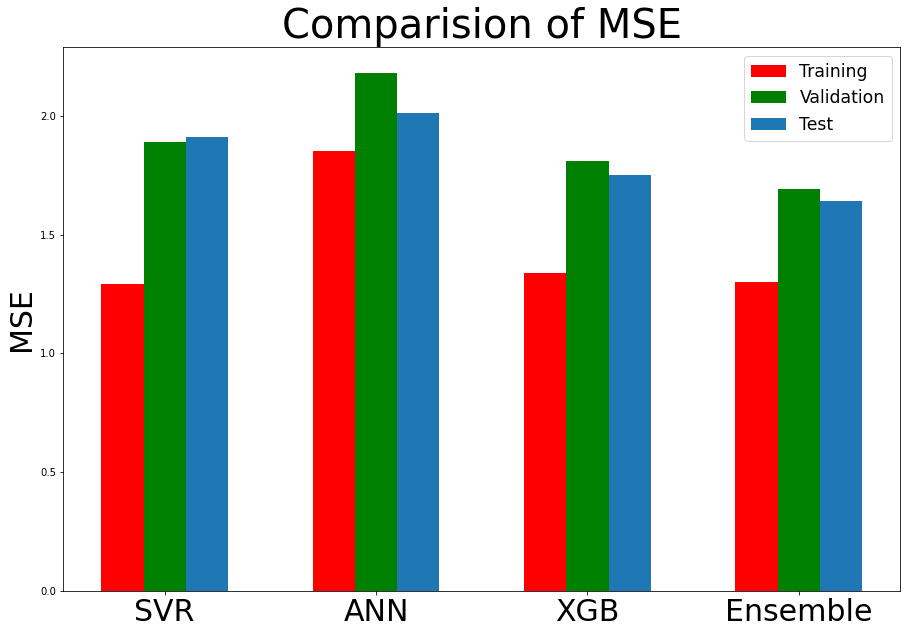

In [8]:
# train_int = init_train_mse
# val_int = init_val_mse
# test_int= init_test_mse


# train_fin = fin_train_mse
# val_fin = fin_val_mse
# test_fin = fin_test_mse


# Numbers of pairs of bars you want
N = 4

# Data on X-axis

# Specify the values of blue bars (height)
train = (1.29,1.85,1.34,1.3)
# Specify the values of orange bars (height)
val = (1.89,2.18,1.81,1.69)

test = (1.91,2.01,1.75,1.64)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(15,10))

# Width of a bar 
width = 0.2      

# Plotting
plt.bar(ind, train , width, label='Training',color ='red')
plt.bar(ind + width, val, width, label='Validation',color='green')
plt.bar(ind + 2*width, test, width, label='Test')


plt.ylabel('MSE',size=30)
plt.title('Comparision of MSE',size=40)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width, ('SVR','ANN','XGB','Ensemble'),size=30)

# Finding the best position for legends and putting it
plt.legend(loc='best',fontsize='xx-large')
plt.savefig('model_comparison.jpg')
plt.show()